In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

titanic/.DS_Store
titanic/titanic-trad-ML.ipynb
titanic/titanic/test.csv
titanic/titanic/train.csv
titanic/titanic/gender_submission.csv


In [5]:
train_data = pd.read_csv("titanic/titanic/train.csv")
test_data = pd.read_csv("titanic/titanic/test.csv")
#train_data
#train_data = train_data.dropna(subset=['Age','Fare'], ignore_index = True)
#train_data.loc[:, 'Fare'].mean()
#print(statistics.median(train_data['Age'].dropna()))
#print(statistics.median(train_data['Fare'].dropna()))
#values = {"Age": 28.0, "Fare": 14.45}

#train_data = train_data.fillna(value=values)
#test_data = test_data.fillna(value=values)
full_data = [train_data, test_data]
#train_data.head()

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data['Survived'].groupby(train_data['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Women had a significantly higher chance of survival.

In [6]:
train_data.groupby(['Sex','Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Women in Pclass 1 and 2 had a significantly higher chance of survival than those in Pclass 3. 

In [7]:
train_data.groupby('Pclass')['Sex'].value_counts(normalize=True)

Pclass  Sex   
1       male      0.564815
        female    0.435185
2       male      0.586957
        female    0.413043
3       male      0.706721
        female    0.293279
Name: proportion, dtype: float64

While the number of men is always higher than women regardless of class, there's significantly more men than women in Pclass 3.

In [8]:
# Load libraries for analysis and visualization

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.offline as py 
from matplotlib import pyplot
import seaborn as sns
py.init_notebook_mode(connected=True)


# Machine learning libraries
import sklearn         
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
#from sklearn.cross_validation import KFold
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# A general overview of data

Text(0.5, 1.0, 'Fig.12: Survival Rate by Embarked')

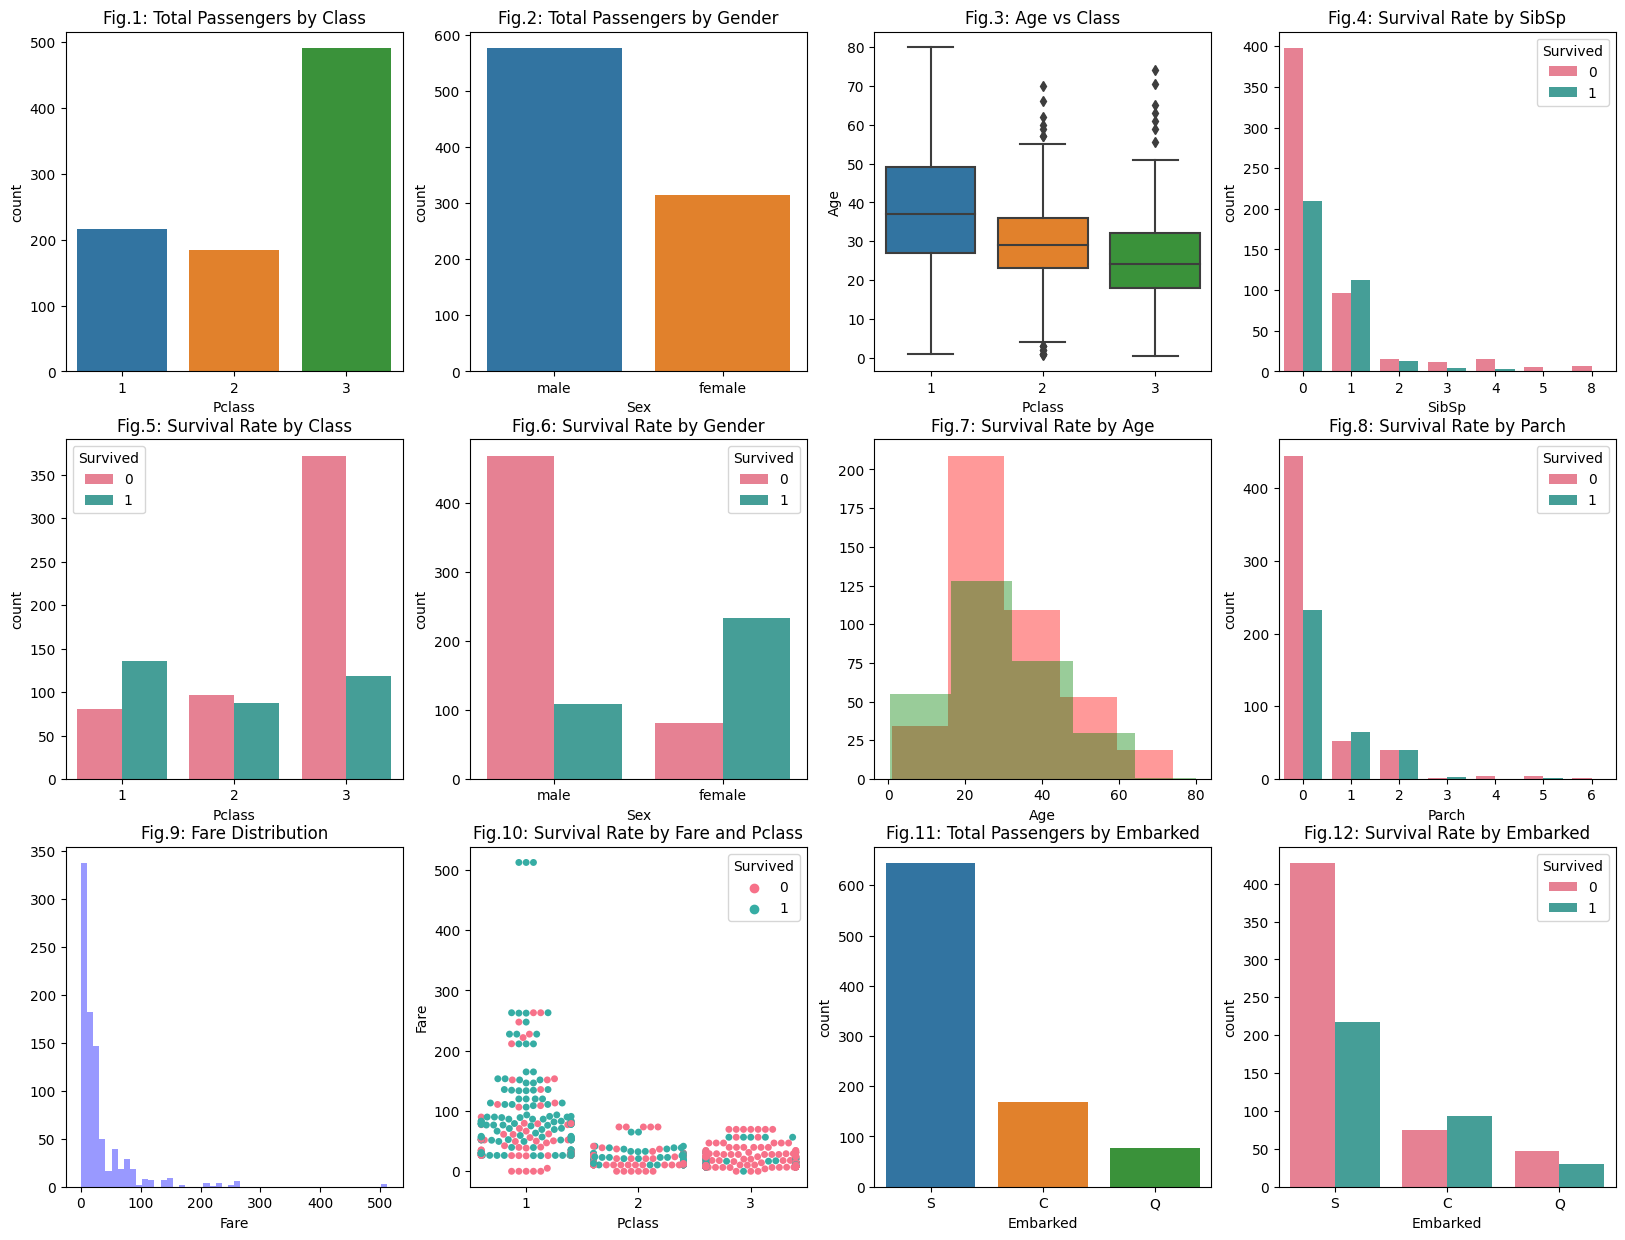

In [9]:
# These plots and some of the analysis are inspired by Yvon Dalat's notebook on Titanic dataset.
f,ax = plt.subplots(3,4,figsize=(20,15))
sns.countplot(x='Pclass',data=train_data, ax=ax[0,0])
sns.countplot(x='Sex',data=train_data,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train_data,ax=ax[0,2])
sns.countplot(x='SibSp',hue='Survived',data=train_data,ax=ax[0,3],palette='husl')
sns.distplot(train_data['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot(x='Embarked',data=train_data,ax=ax[2,2])

sns.countplot(x='Pclass',hue='Survived',data=train_data,ax=ax[1,0],palette='husl')
sns.countplot(x='Sex',hue='Survived',data=train_data,ax=ax[1,1],palette='husl')
sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot(x='Parch',hue='Survived',data=train_data,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train_data,palette='husl',ax=ax[2,1])
sns.countplot(x='Embarked',hue='Survived',data=train_data,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Fig.1: Total Passengers by Class')
ax[0,1].set_title('Fig.2: Total Passengers by Gender')
ax[0,2].set_title('Fig.3: Age vs Class')
ax[0,3].set_title('Fig.4: Survival Rate by SibSp')
ax[1,0].set_title('Fig.5: Survival Rate by Class')
ax[1,1].set_title('Fig.6: Survival Rate by Gender')
ax[1,2].set_title('Fig.7: Survival Rate by Age')
ax[1,3].set_title('Fig.8: Survival Rate by Parch')
ax[2,0].set_title('Fig.9: Fare Distribution')
ax[2,1].set_title('Fig.10: Survival Rate by Fare and Pclass')
ax[2,2].set_title('Fig.11: Total Passengers by Embarked')
ax[2,3].set_title('Fig.12: Survival Rate by Embarked')

- Age: The shape of the age distribution look similar for both survived and deceased people, see **Fig. 7**. However, the number of people in age group [20-30] vividly varies for survived and dead. In other words, if passengers are in that age group they have a significantly lower chance of survival. At the same time, most of the people in this group seem to belong to Pclass 2 and 3, see ***Fig. 3***.

- Pclass: While most people in pclass 3 did not survive, the majority in pclass 1 survived, see **Fig. 5**. However, the chance of survival in pclass 2 seem to be about 50 percent. How do we account for this? What makes one person survive in pclass 2? It could be that it matters more in pclass 2 if the person is female more than class 1 and 3. Maybe we should group Pclass and sex: (rich female: 0, rich male: 1, middle-class female: 2, middle-class male: 3, poo female: 4, poor male: 5)

- Sex: As stated earlier, it is very clear that sex is a critical factor. Women had a higher chance of survival, see ***Fig.  6***. It would be interesting to see the correlation between the Pclass_Sex combination and survival rate. We will look into this later.

- It matters which port passengers embarked. Southampton had higher rate of death, see ***Fig. 12***

- Fare has a skewed distibution, see **Fig 9***. We deal with this later

- It seems like we might be able to add Parch and SibSp together as the distributions are similar, see ***Fig. 4 & 8***.

# 1. Feature engineering

## 1.1 Feature distribution and other properties



### Name

<Axes: xlabel='Name_length', ylabel='Survived'>

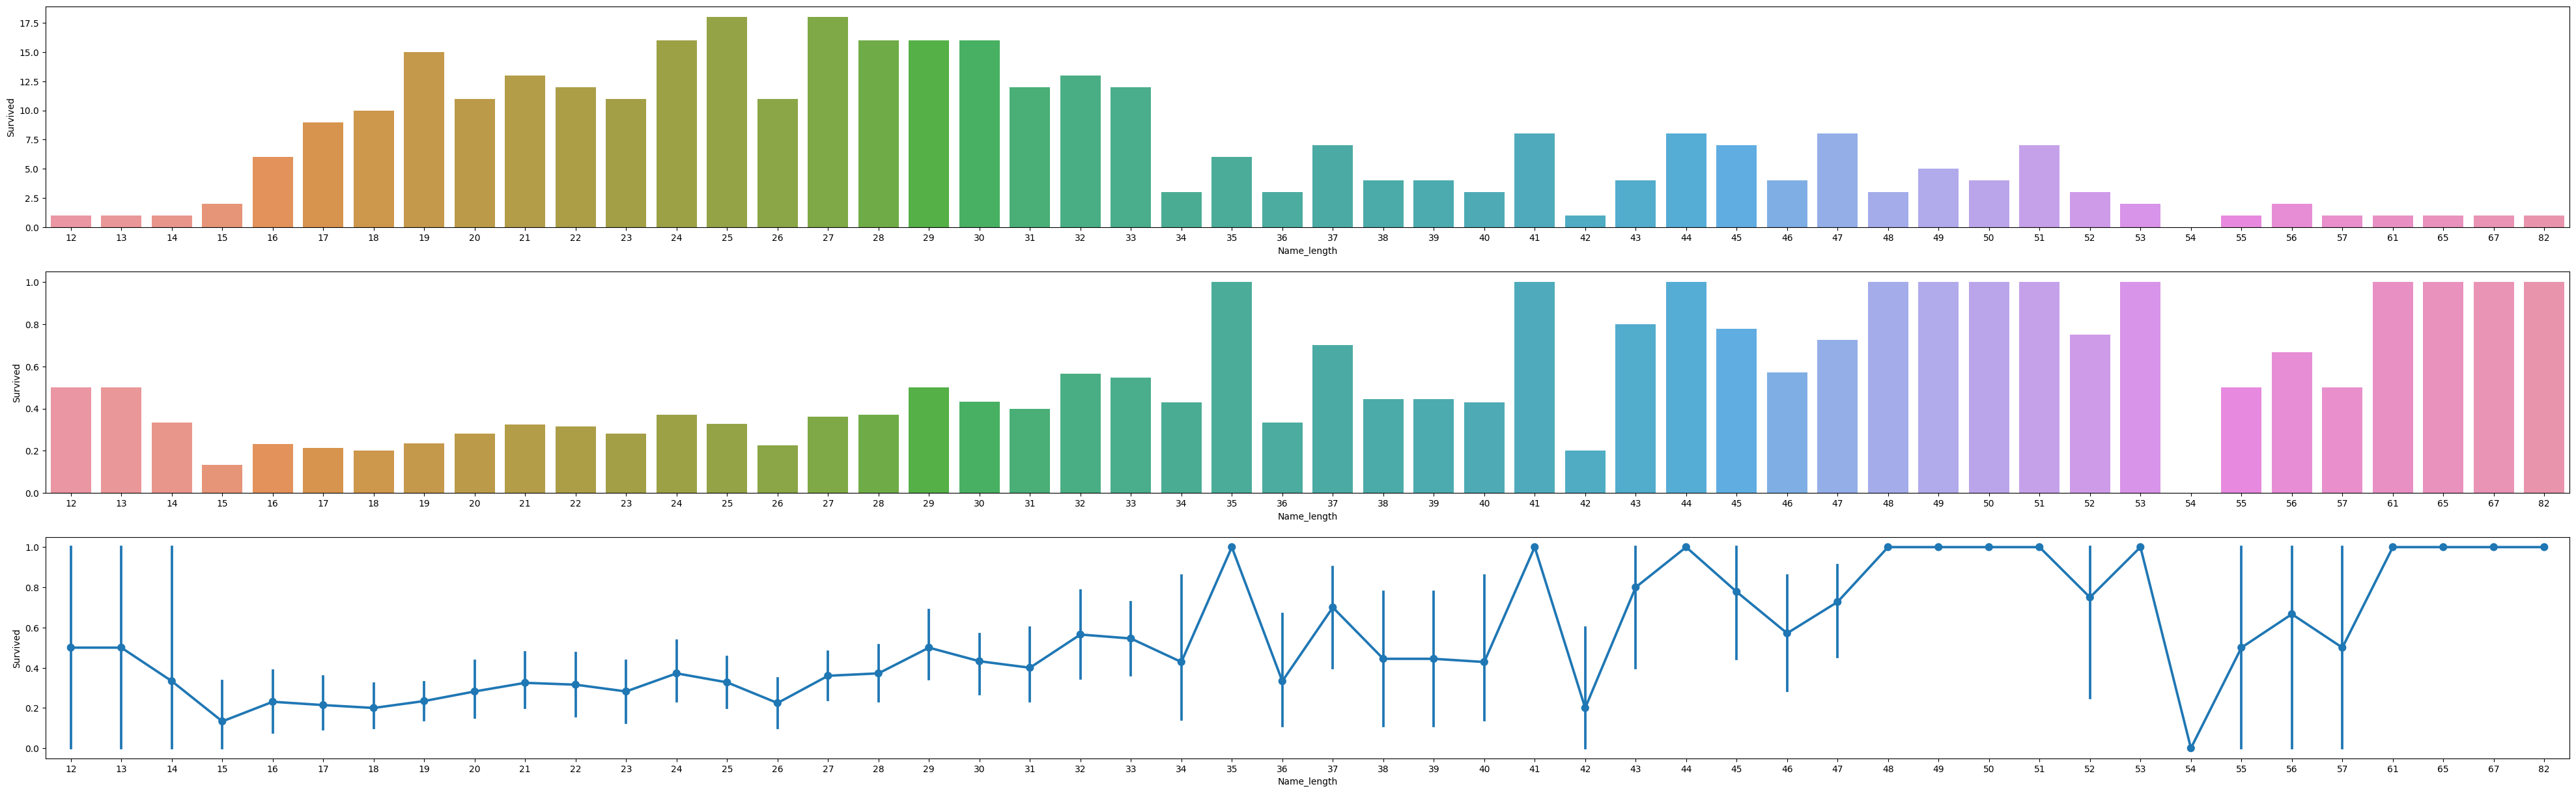

In [10]:
for dataset in full_data:
    dataset['Name_length'] = dataset['Name'].apply(len)


sum_Name = train_data[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).sum()
average_Name = train_data[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).mean()
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(50,15))
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = axis1)
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = axis2)
sns.pointplot(x = 'Name_length', y = 'Survived', data=train_data, ax = axis3)

There seems to be some correlation between name_length and survival rate. Therefore we can group passengers based on their length of name

In [11]:
for dataset in full_data:
   # dataset['class_sex'] = None
    dataset.loc[(dataset['Name_length'] <= 25), 'name_group'] = 0
    dataset.loc[((dataset['Name_length'] > 25) & (dataset['Name_length'] <= 40)) , 'name_group'] = 1
    dataset.loc[((dataset['Name_length'] > 40) & (dataset['Name_length'] <= 50)) , 'name_group'] = 2
    dataset.loc[(dataset['Name_length'] > 50), 'name_group'] = 3

### Pclass vs Sex

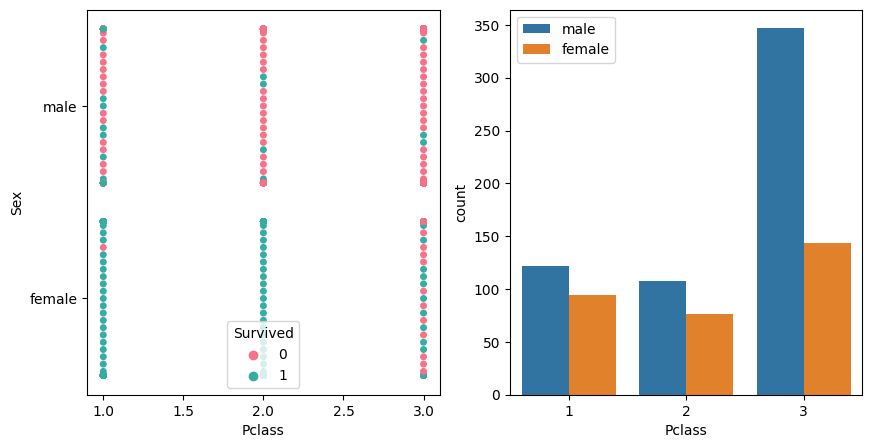

In [12]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
g1 = sns.swarmplot(x='Pclass',y='Sex',hue='Survived',data=train_data,palette='husl', ax=axis1)
g2 = sns.countplot(x='Pclass', hue='Sex',data=train_data, ax=axis2)
g2 = g2.legend(loc="best")

As I metioned in the general overview, it looks like it matters whether the passenger is female or male in order to survive in Pclass 1 & 2 (This is also true for the other two classes but much more nuanced in Pclass 2). Therefore we group Pclass and sex.

In [13]:
#full_data['class_sex'] = 0
for dataset in full_data:
    dataset['class_sex'] = None
    dataset.loc[((dataset['Sex'] == 'female') & (dataset['Pclass'] <= 2)), 'class_sex'] = 0
    dataset.loc[((dataset['Sex'] == 'female') & (dataset['Pclass'] == 3)), 'class_sex'] = 1
    dataset.loc[((dataset['Sex'] == 'male') & (dataset['Pclass'] <= 2)), 'class_sex'] = 2
    dataset.loc[((dataset['Sex'] == 'male') & (dataset['Pclass'] == 3)), 'class_sex'] = 3
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,name_group,class_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,0.0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,3.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,2.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,0.0,3


-0.5980832846821362

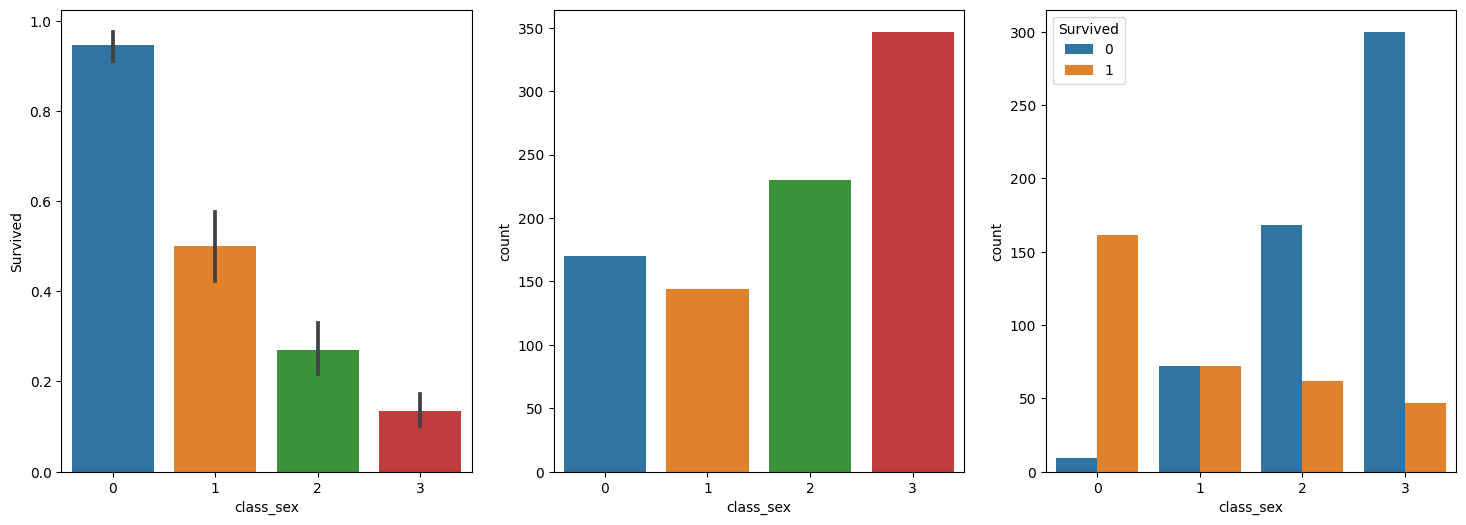

In [14]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(18,6))
sns.barplot(x='class_sex', y='Survived', data=train_data, ax=axis1)
sns.countplot(x='class_sex', data=train_data, ax=axis2)
sns.countplot(x='class_sex', data=train_data, hue='Survived', ax=axis3)
train_data['class_sex'].corr(train_data['Survived'])

### Parch and SibSp:

- We create family for Parch and SibSp

<Axes: xlabel='is alone', ylabel='count'>

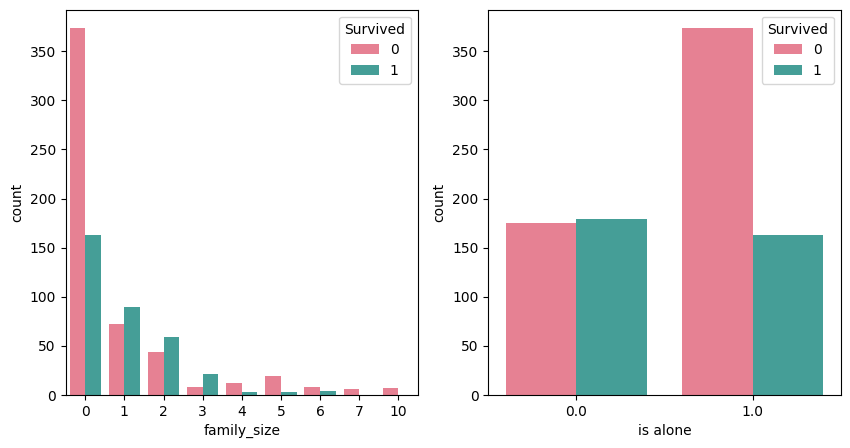

In [15]:
for dataset in full_data:
    dataset['family_size'] = dataset['Parch'] + dataset['SibSp']
    dataset.loc[dataset['family_size'] == 0, 'is alone'] = 1
    dataset.loc[dataset['family_size'] > 0 , 'is alone'] = 0

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='family_size',hue='Survived',data=train_data,palette='husl', ax=axis1)
sns.countplot(x='is alone',hue='Survived',data=train_data,palette='husl', ax=axis2)


- I made 'family size' based on the total number of SibSp and Parch
- Apparently, family size does not matter much. It matters if the person is alone or not.

### Fare

In [16]:
# fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
# sns.distplot(train_data['Fare'].dropna(),kde=False,color='b', ax = axis1)
# sns.boxplot(x='Pclass',y='Fare',data=train_data,ax=axis2)

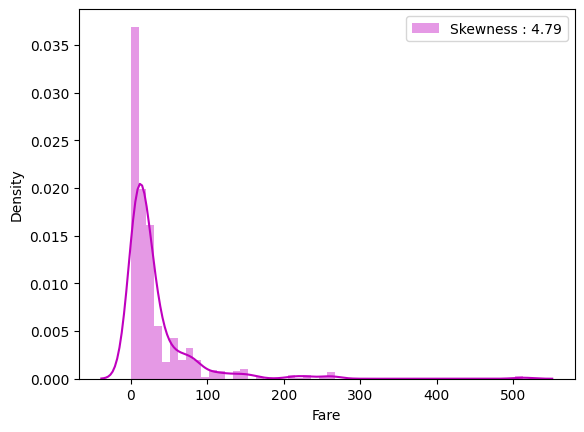

In [17]:
# Explore Fare distribution 
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
g = sns.distplot(train_data["Fare"], color="m", label="Skewness : %.2f"%(train_data["Fare"].skew()))
g = g.legend(loc="best")

- The fare distribution is skewed towards the left.
- We replace NA values with median. 
- Pclass and fare seem to be moderately correlated. We'll keep both.

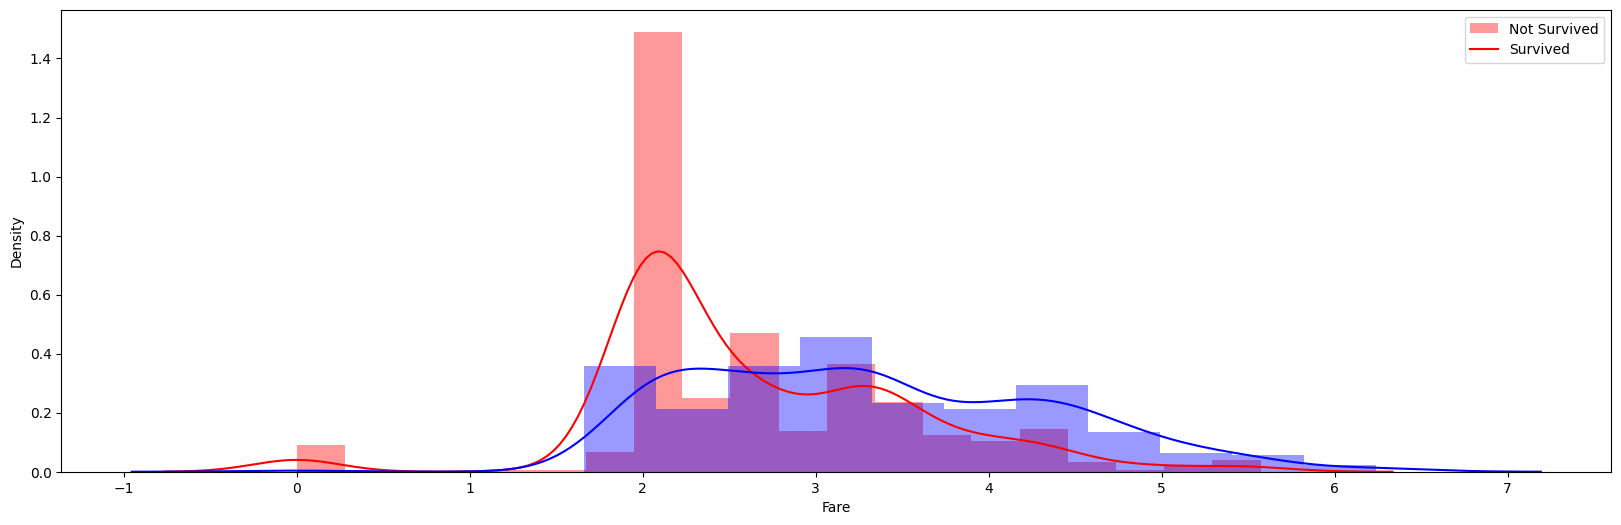

In [18]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.distplot(train_data["Fare"][train_data["Survived"] == 0], color="r", label="Skewness : %.2f"%(train_data["Fare"].skew()), ax=ax)
g = sns.distplot(train_data["Fare"][train_data["Survived"] == 1], color="b", label="Skewness : %.2f"%(train_data["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

In [19]:
for dataset in full_data:
    dataset.loc[train_data["Fare"] < 2.7, "fare_group"] = 0
    dataset.loc[train_data["Fare"] >= 2.7, "fare_group"] = 3
train_data["fare_group"].value_counts()

fare_group
0.0    457
3.0    434
Name: count, dtype: int64

### Cabin

In [20]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train_data[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


<Axes: xlabel='Has_Cabin', ylabel='count'>

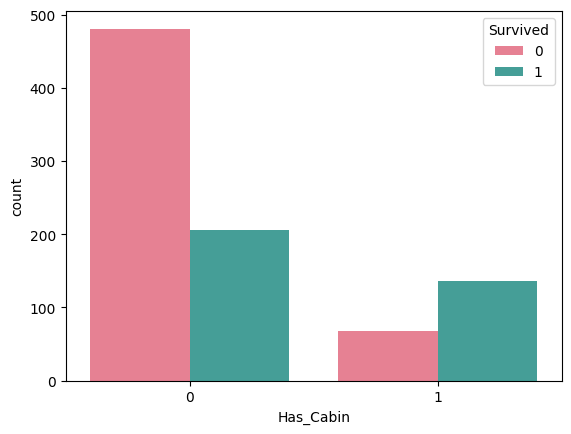

In [21]:
sns.countplot(x='Has_Cabin',hue='Survived',data=train_data,palette='husl')

Observations:

- If the passenger has cabin they are more likely to survive. We can further investigate if 

### Embarked

In [22]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

I am not doing any analysis on Embarked for now...

### Sex

In [23]:
for data in full_data:
    data.loc[data['Sex'] == 'male', 'Sex'] = 1
    data.loc[data['Sex'] == 'female', 'Sex'] = 0


In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,name_group,class_sex,family_size,is alone,fare_group,Has_Cabin
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,2,16,0.0,3,0,1.0,0.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,0,32,1.0,1,1,0.0,3.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,2,25,0.0,2,0,1.0,0.0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,0,16,0.0,3,0,1.0,3.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,0,44,2.0,1,2,0.0,0.0,0


In [25]:
for dataset in full_data:
    dataset['Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==0), 'Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==2), 'Gender_Embarked'] = 1
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==1), 'Gender_Embarked'] = 2
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==2), 'Gender_Embarked'] = 3
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==0), 'Gender_Embarked'] = 4
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==1), 'Gender_Embarked'] = 5
train_data[["Gender_Embarked", "Survived"]].groupby(['Gender_Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Gender_Embarked,Survived
2,2,0.876712
1,1,0.750000
0,0,0.692683
5,5,0.305263
4,4,0.174603
3,3,0.073171


# 3. Learning

### 3.1 Drop elements



In [26]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Name_length','Fare']
test_data_init = test_data.copy()
train_data = train_data.drop(drop_elements, axis = 1)
test_data  = test_data.drop(drop_elements, axis = 1)

<Axes: title={'center': 'Pearson Correlation of Features'}>

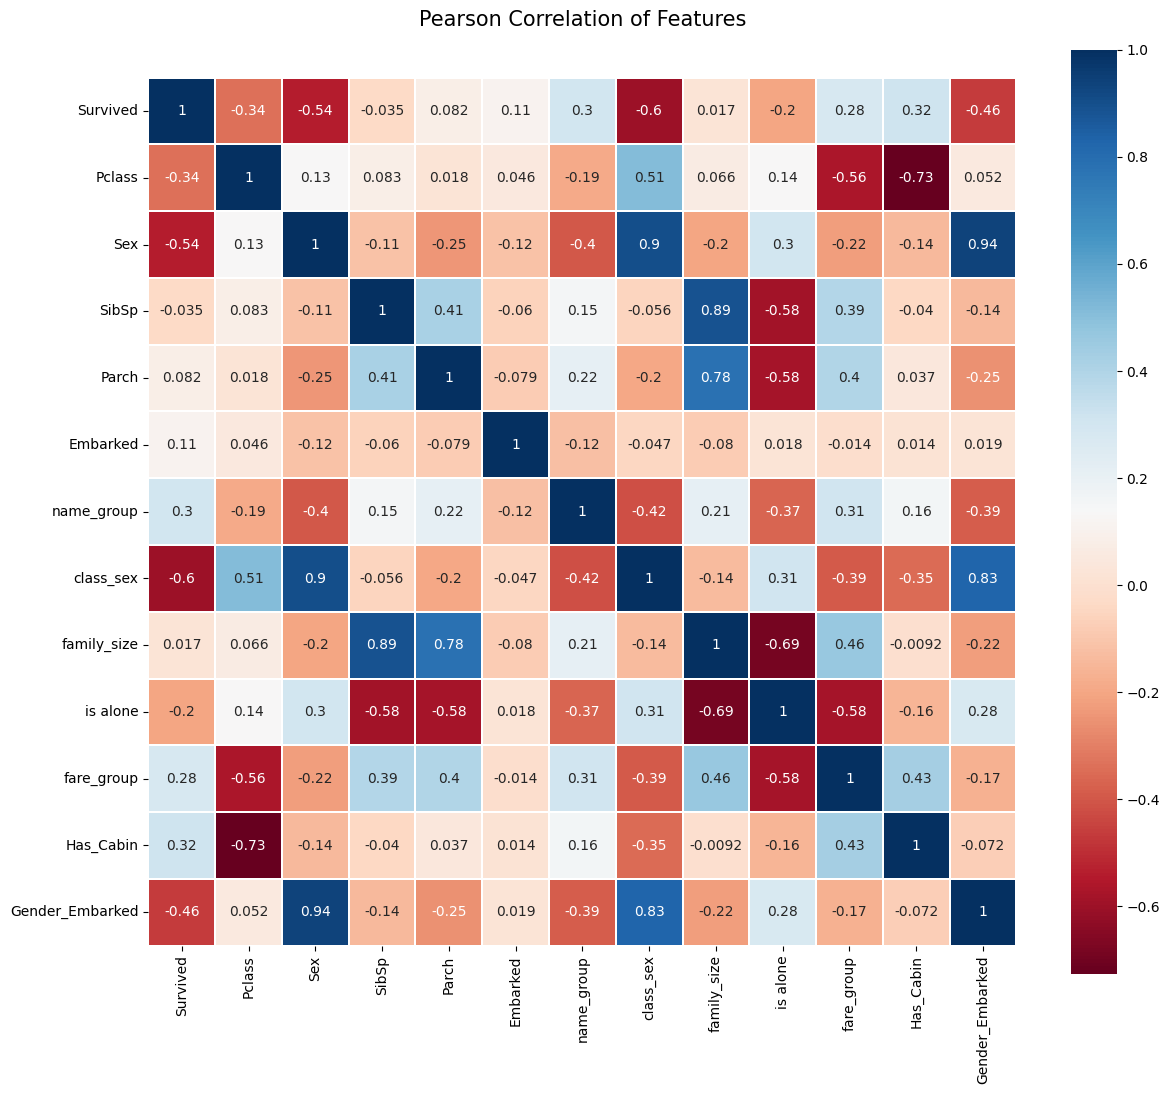

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Most of the features I kept seem to be not highly-correlated

## 3.2 Random Forest

In [28]:
# Random Forest

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
train_data_tmp = train_data.copy()
X_train = train_data_tmp.drop("Survived", axis=1)
Y_train = train_data_tmp["Survived"]
scores = cross_val_score(model, X_train, Y_train, cv=5)
scores


array([0.81564246, 0.81460674, 0.80337079, 0.79775281, 0.81460674])

## 3.3 Logistic Regression

I choose not to use all features for logistic regression. I take combinations of 4 features, and cross validate. It turns out that logistic regression could give results almost as accurate as random forests.

In [29]:
def combinations(A,k):
    if k==1:
        return [{x} for x in A]
    sets = []
    for x in A:
        for y in combinations(A-{x},k=k-1):
            if {x}|y not in sets:
                sets.append({x}|y)
    return sets

In [30]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression


split_num = 3
split_size = round(train_data.shape[0] / split_num)

features = ["class_sex", "fare_group", "SibSp", "Parch", "family_size", "is alone", "Sex"]
feature_sets = combinations(set(features), 4)
weightdict = {0:.65, 1:.35}
for sub_f_set in feature_sets:
    error = []
    sub_f_l = list(sub_f_set)
    print(sub_f_set)
    for i in range(split_num):
        indices = list(range(i * split_size, (i+1) * split_size))
        train_data_tmp = train_data.copy()
        test_data_tmp = train_data_tmp.loc[indices,:].copy()
        train_data_tmp = train_data_tmp.drop(indices)
       # print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
        y = train_data_tmp["Survived"]
        X = pd.get_dummies(train_data_tmp[sub_f_l])
        X_test = pd.get_dummies(test_data_tmp[sub_f_l])

        model = LogisticRegression(random_state=1, class_weight=weightdict).fit(X, y)
        predictions = model.predict(X_test)
        error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
       # print(error)
    mean_error = sum(error) / len(error)
    print(mean_error)

{'SibSp', 'Parch', 'class_sex', 'is alone'}
0.2143658810325477
{'Parch', 'family_size', 'class_sex', 'is alone'}
0.2143658810325477
{'is alone', 'Parch', 'class_sex', 'fare_group'}
0.21099887766554434
{'Parch', 'class_sex', 'is alone', 'Sex'}
0.2132435465768799
{'SibSp', 'family_size', 'class_sex', 'is alone'}
0.2143658810325477
{'is alone', 'family_size', 'class_sex', 'fare_group'}
0.20538720538720537
{'family_size', 'class_sex', 'is alone', 'Sex'}
0.21548821548821548
{'SibSp', 'Sex', 'class_sex', 'is alone'}
0.21212121212121213
{'is alone', 'Sex', 'class_sex', 'fare_group'}
0.2132435465768799
{'SibSp', 'is alone', 'class_sex', 'fare_group'}
0.2132435465768799
{'SibSp', 'Parch', 'family_size', 'class_sex'}
0.2132435465768799
{'Parch', 'family_size', 'class_sex', 'Sex'}
0.2132435465768799
{'Parch', 'family_size', 'class_sex', 'fare_group'}
0.20426487093153758
{'SibSp', 'Parch', 'class_sex', 'Sex'}
0.21548821548821548
{'Parch', 'class_sex', 'fare_group', 'Sex'}
0.20650953984287315
{'Sib

In [31]:
# # Logistic regression, submission cell
# from sklearn.linear_model import LogisticRegression

# weightdict = {0:.65, 1:.35}
# y = train_data["Survived"]
# #features = ['Age', 'Sex', 'Pclass', 'SibSp']
# features = ['class_sex', 'Sex', 'fare_group', 'family_size']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = LogisticRegression(random_state=1, solver='liblinear', class_weight=weightdict).fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [32]:
# # Logistic regression 
# from sklearn.linear_model import LogisticRegression

# #weightdict = {0:.65, 1:.35}
# model = LogisticRegression(random_state=1, class_weight='balanced').fit(X_train, Y_train)
# predictions = model.predict(x_test)
# print(predictions)
# error = sum(predictions != y_test) / test_data.shape[0]
# print(error)

In [33]:
# # Logistic regression, submission cell
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=1, class_weight='balanced').fit(X_train, Y_train)
# predictions = model.predict(test_data)
# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

### 3.2 Perform PCA analysis 

In [34]:
# from sklearn import datasets, decomposition
# from sklearn.model_selection import train_test_split

# train_data_tmp = train_data.copy()
# X_train = train_data_tmp.drop("Survived", axis=1)
# Y_train = train_data_tmp["Survived"]
# pca = decomposition.PCA(n_components=4)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)
# x_test.shape

### 3.3 Test accuracy of PCA components for training using logistic regression

In [35]:
# # Logistic regression 
# from sklearn.linear_model import LogisticRegression

# weightdict = {0:.65, 1:.35}
# model = LogisticRegression(random_state=1, class_weight=weightdict).fit(X_train, Y_train)
# predictions = model.predict(x_test)
# print(predictions)
# error = sum(predictions != y_test) / test_data.shape[0]
# print(error)


In [36]:
# # Logistic regression, submission cell
# from sklearn.linear_model import LogisticRegression

# weightdict = {0:.65, 1:.35}
# model = LogisticRegression(random_state=1, solver='liblinear', class_weight=weightdict).fit(X_train, Y_train)
# X_test = pca.transform(test_data)
# predictions = model.predict(X_test)
# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

### 3.3 Test accuracy of PCA components for training using SVC RBF and Quadratic

In [37]:
# # SVC RBF and Quadratic
# from sklearn.linear_model import LogisticRegression

# c_value = 10 ** (5)
# model = SVC(kernel='poly', degree=2, C=c_value, coef0=1.0)
# model.fit(X_train, Y_train)
# predictions = model.predict(x_test)
# error = sum(predictions != y_test) / test_data.shape[0]
# print(error)


In [38]:
# # SVC RBF and Quadratic

# c_value = 10 ** (5)
# model = SVC(kernel='poly', degree=2, C=c_value, coef0=1.0)
# model.fit(X_train, Y_train)
# X_test = pca.transform(test_data)
# predictions = model.predict(X_test)
# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

### 3.3 Test accuracy of PCA components for training using Random Forest

In [39]:
# # Random Forest
# from sklearn.linear_model import LogisticRegression


# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# model.fit(X_train, Y_train)
# predictions = model.predict(x_test)
# error = sum(predictions != y_test) / test_data.shape[0]
# print(error)


In [40]:
# # Random Forest


# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# model.fit(X_train, Y_train)
# X_test = pca.transform(test_data)
# predictions = model.predict(X_test)
# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

### 4.1 Test accuracy of Kernel PCA components for training using Random Forest

In [41]:
# from sklearn import datasets, decomposition
# from sklearn.model_selection import train_test_split

# train_data_tmp = train_data.copy()
# X_train = train_data_tmp.drop("Survived", axis=1)
# Y_train = train_data_tmp["Survived"]
# kernel_pca = decomposition.KernelPCA(
#     n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
# )
# kernel_pca.fit(X_train)
# X_train = kernel_pca.transform(X_train)
# X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)
# x_test.shape

In [42]:
# # Random Forest

# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# model.fit(X_train, Y_train)
# predictions = model.predict(x_test)
# error = sum(predictions != y_test) / test_data.shape[0]
# print(error)

In [43]:
# # Random Forest


# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# model.fit(X_train, Y_train)
# X_test = kernel_pca.transform(test_data)
# predictions = model.predict(X_test)
# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

### 5.1 Learning without doing PCA analysis

In [44]:
# train_data_tmp = train_data.copy()
# X_train = train_data_tmp.drop(['Survived'], axis=1)
# Y_train = train_data_tmp["Survived"]
# X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=11)
# X_train.head()

In [45]:
# # Logistic regression 
# from sklearn.linear_model import LogisticRegression

# #weightdict = {0:.65, 1:.35}
# model = LogisticRegression(random_state=1, class_weight='balanced').fit(X_train, Y_train)
# predictions = model.predict(x_test)
# print(predictions)
# error = sum(predictions != y_test) / test_data.shape[0]
# print(error)

In [46]:
# # Logistic regression, submission cell
# from sklearn.linear_model import LogisticRegression

# weightdict = {0:.65, 1:.35}
# y = train_data["Survived"]
# features = ['Age', 'Sex', 'Pclass', 'SibSp']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = LogisticRegression(random_state=1, solver='liblinear', class_weight=weightdict).fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [47]:
# # Logistic regression, submission cell
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=1, class_weight='balanced').fit(X_train, Y_train)
# predictions = model.predict(test_data)
# output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [48]:
test_data

,Pclass,Sex,SibSp,Parch,Embarked,name_group,class_sex,family_size,is alone,fare_group,Has_Cabin,Gender_Embarked
0,3,1,0,0,2,0.0,3,0,1.0,0.0,0,3
1,3,0,1,0,0,1.0,1,1,0.0,3.0,0,0
2,2,1,0,0,2,0.0,2,0,1.0,0.0,0,3
3,3,1,0,0,0,0.0,3,0,1.0,3.0,0,4
4,3,0,1,1,0,2.0,1,2,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,0,0.0,3,0,1.0,0.0,0,4
414,1,0,0,0,1,1.0,0,0,1.0,0.0,1,2
415,3,1,0,0,0,1.0,3,0,1.0,0.0,0,4
416,3,1,0,0,0,0.0,3,0,1.0,3.0,0,4


In [49]:
# # Random forest classifier using all combinations of features
# from sklearn.ensemble import RandomForestClassifier

# split_num = 3
# split_size = round(train_data.shape[0] / split_num)

# features = ["class_sex", "fare_group", "SibSp", "Parch"]
# feature_sets = combinations(set(features), 4)
# for sub_f_set in feature_sets:
#     error = []
#     sub_f_l = list(sub_f_set)
#     print(sub_f_set)
#     for i in range(split_num):
#         indices = list(range(i * split_size, (i+1) * split_size - 1))
#         train_data_tmp = train_data.copy()
#         test_data_tmp = train_data_tmp.loc[indices,:].copy()
#         train_data_tmp = train_data_tmp.drop(indices)
#      #   print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
#         y = train_data_tmp["Survived"]
#         X = pd.get_dummies(train_data_tmp[sub_f_l])
#         X_test = pd.get_dummies(test_data_tmp[sub_f_l])

#         model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
#         model.fit(X, y)
#         predictions = model.predict(X_test)
#         error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
#      #   print(error)
#     mean_error = sum(error) / len(error)
#     print(mean_error)

In [50]:
# # Logistic regression 
# from sklearn.linear_model import LogisticRegression


# split_num = 3
# split_size = round(train_data.shape[0] / split_num)

# features = ["class_sex", "fare_group", "SibSp", "Parch"]
# feature_sets = combinations(set(features), 4)
# weightdict = {0:.7, 1:.3}
# for sub_f_set in feature_sets:
#     error = []
#     sub_f_l = list(sub_f_set)
#     print(sub_f_set)
#     for i in range(split_num):
#         indices = list(range(i * split_size, (i+1) * split_size))
#         train_data_tmp = train_data.copy()
#         test_data_tmp = train_data_tmp.loc[indices,:].copy()
#         train_data_tmp = train_data_tmp.drop(indices)
#        # print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
#         y = train_data_tmp["Survived"]
#         X = pd.get_dummies(train_data_tmp[sub_f_l])
#         X_test = pd.get_dummies(test_data_tmp[sub_f_l])

#         model = LogisticRegression(random_state=1, class_weight=weightdict).fit(X, y)
#         predictions = model.predict(X_test)
#         error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
#        # print(error)
#     mean_error = sum(error) / len(error)
#     print(mean_error)

In [51]:
# from sklearn.neighbors import KDTree

# split_num = 5
# split_size = round(train_data.shape[0] / split_num)
# error = []
# for i in range(split_num):
#     indices = list(range(i * split_size, (i+1) * split_size))
#     train_data_tmp = train_data.copy()
#     test_data_tmp = train_data_tmp.loc[indices,:].copy()
#     train_data_tmp = train_data_tmp.drop(indices)
#     print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
#     y = train_data_tmp["Survived"]

#     features = ['SibSp', 'Pclass', 'Sex', 'Age']
#     X = pd.get_dummies(train_data_tmp[features])
#     X_test = pd.get_dummies(test_data_tmp[features])
#     train_data_tmp.loc[train_data_tmp["Sex"]=="female", "Sex"] = 0
#     train_data_tmp.loc[train_data_tmp["Sex"]=="male", "Sex"] = 1
#     kd_tree = KDTree(train_data_tmp[features])
#     test_neighbors = np.squeeze(kd_tree.query(test_data_tmp, k=1, return_distance=False))
#     kd_tree_predictions = train_data_tmp[test_neighbors]
#     error.append(sum(kd_tree_predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
# #    print(error)
# mean_error = sum(error) / len(error)
# print(mean_error)

In [52]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ['Fare', 'Pclass', 'Sex', 'Age']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [53]:
# # Logistic regression, submission cell
# from sklearn.linear_model import LogisticRegression

# weightdict = {0:.65, 1:.35}
# y = train_data["Survived"]
# features = ['Age', 'Sex', 'Pclass', 'SibSp']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = LogisticRegression(random_state=1, solver='liblinear', class_weight=weightdict).fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [54]:
# from sklearn.neighbors import KDTree

# split_num = 3
# split_size = round(train_data.shape[0] / split_num)

# features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "PassengerId", "Embarked"]
# feature_sets = combinations(set(features), 4)
# for sub_f_set in feature_sets:
#     error = []
#     sub_f_l = list(sub_f_set)
#     print(sub_f_set)
#     for i in range(split_num):
#         indices = list(range(i * split_size, (i+1) * split_size - 1))
#         train_data_tmp = train_data.copy()
#         test_data_tmp = train_data_tmp.loc[indices,:].copy()
#         train_data_tmp = train_data_tmp.drop(indices)
#      #   print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
#         y = train_data_tmp["Survived"]
#         X = pd.get_dummies(train_data_tmp[sub_f_l])
#         X_test = pd.get_dummies(test_data_tmp[sub_f_l])

#         model = RotationForest(n_estimators=10)
#         model.fit(X, y)
#         predictions = model.predict(X_test)
#         error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
#      #   print(error)
#     mean_error = sum(error) / len(error)
#     print(mean_error)


## 3.3 Logistic Regression

First we try the linear SVM method and then we move to Kernel-based SVM. We also vary the regularization parameter (c_value) for optimization purposes. A small c_value means the slack is more free, and larger values mean hard-margin SVM.

In [55]:
# Test SVM with varying C
from sklearn import svm

split_num = 5
split_size = round(train_data.shape[0] / split_num)

features = ["class_sex", "fare_group", "SibSp", "Parch", "family_size", "is alone", "Sex"]
feature_sets = combinations(set(features), 4)
for sub_f_set in feature_sets:
    error = []
    sub_f_l = list(sub_f_set)
    print(sub_f_set)
    for i in range(split_num):
        indices = list(range(i * split_size, (i+1) * split_size - 1))
        train_data_tmp = train_data.copy()
        test_data_tmp = train_data_tmp.loc[indices,:].copy()
        train_data_tmp = train_data_tmp.drop(indices)
     #   print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
        y = train_data_tmp["Survived"]
        X = pd.get_dummies(train_data_tmp[sub_f_l])
        X_test = pd.get_dummies(test_data_tmp[sub_f_l])

        model = svm.LinearSVC(C=100, loss='hinge')
        model.fit(X, y)
        predictions = model.predict(X_test)
        error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
     #   print(error)
    mean_error = sum(error) / len(error)
    print(mean_error)


{'SibSp', 'Parch', 'class_sex', 'is alone'}
0.20338983050847456
{'Parch', 'family_size', 'class_sex', 'is alone'}
0.21016949152542375
{'is alone', 'Parch', 'class_sex', 'fare_group'}
0.21920903954802257
{'Parch', 'class_sex', 'is alone', 'Sex'}
0.22598870056497175
{'SibSp', 'family_size', 'class_sex', 'is alone'}
0.21016949152542375
{'is alone', 'family_size', 'class_sex', 'fare_group'}
0.22711864406779664
{'family_size', 'class_sex', 'is alone', 'Sex'}
0.21016949152542375
{'SibSp', 'Sex', 'class_sex', 'is alone'}
0.21920903954802262
{'is alone', 'Sex', 'class_sex', 'fare_group'}
0.2305084745762712
{'SibSp', 'is alone', 'class_sex', 'fare_group'}
0.2214689265536723
{'SibSp', 'Parch', 'family_size', 'class_sex'}
0.21355932203389832
{'Parch', 'family_size', 'class_sex', 'Sex'}
0.21355932203389832
{'Parch', 'family_size', 'class_sex', 'fare_group'}
0.22598870056497175
{'SibSp', 'Parch', 'class_sex', 'Sex'}
0.21694915254237288
{'Parch', 'class_sex', 'fare_group', 'Sex'}
0.2305084745762712


In [56]:
# # Support Vector Machine (SVM)
# from sklearn import svm
# #features = ["class_sex", "Fare", "SibSp", "name_group"]
# features = ["class_sex", "fare_group", "SibSp", "Parch", "family_size", "is alone", "Sex"]
# #features = ["Pclass", "Sex", "SibSp", "Parch"] # These are Alexis' selected features
# split_num = 4
# split_size = round(train_data.shape[0] / split_num)
# error = []
# for c_exp in range(5):
#     c_value = 10 ** (c_exp - 4)
#     error = []
#     for i in range(split_num):
#         indices = list(range(i * split_size, (i+1) * split_size - 1))
#         train_data_tmp = train_data.copy()
#         test_data_tmp = train_data_tmp.loc[indices,:].copy()
#         train_data_tmp = train_data_tmp.drop(indices)
#      #   print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
#         y = train_data_tmp["Survived"]
#         X = pd.get_dummies(train_data_tmp[features])
#         X_test = pd.get_dummies(test_data_tmp[features])

#         model = svm.LinearSVC(C=c_value, loss='hinge')
#         model.fit(X, y)
#         predictions = model.predict(X_test)
#         error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
#      #   print(error)
#     mean_error = sum(error) / len(error)
#     print(mean_error)


Now, we try SVC with kernel to try non-linear decision boundaries.

In [57]:
# SVC RBF and Quadratic
# Support Vector Machine (SVM)
#features = ["class_sex", "Fare", "SibSp", "name_group"]
features = ["class_sex", "fare_group", "SibSp", "Parch", "family_size", "is alone", "Sex"]
#features = ["Pclass", "Sex", "SibSp", "Parch"] # These are Alexis' selected features
split_num = 4
split_size = round(train_data.shape[0] / split_num)
error = []
s_value = 50
for c_exp in range(8):
    c_value = 10 ** (c_exp - 4)
    error = []
    for i in range(split_num):
        indices = list(range(i * split_size, (i+1) * split_size - 1))
        train_data_tmp = train_data.copy()
        test_data_tmp = train_data_tmp.loc[indices,:].copy()
        train_data_tmp = train_data_tmp.drop(indices)
     #   print(train_data_tmp.shape[0] + test_data_tmp.shape[0])
        y = train_data_tmp["Survived"]
        X = pd.get_dummies(train_data_tmp[features])
        X_test = pd.get_dummies(test_data_tmp[features])
        model = SVC(kernel='poly', degree=2, C=c_value, coef0=1.0)
        model.fit(X, y)
        predictions = model.predict(X_test)
        error.append(sum(predictions != test_data_tmp['Survived']) / test_data_tmp.shape[0])
     #   print(error)
    mean_error = sum(error) / len(error)
    print(c_value, mean_error)


0.0001 0.384009009009009
0.001 0.384009009009009
0.01 0.23873873873873874
0.1 0.19144144144144146
1 0.1981981981981982
10 0.19594594594594594
100 0.19819819819819823
1000 0.19819819819819823


- These are the error rates we get with LinearSVC with various c_value for features = ["class_sex", "Fare", "SibSp", "Sex"]:
0.40202702702702703
0.24887387387387389
0.21283783783783783
0.24211711711711711
0.22635135135135137


In [58]:
# # svm, submission cell
# from sklearn import svm
# c_exp = 2
# c_value = 10 ** (c_exp - 4)
# y = train_data["Survived"]
# features = ["class_sex", "Fare", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = svm.LinearSVC(C=c_value, loss='hinge')
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [59]:
# SVC RBF, submission cell
from sklearn import svm
c_exp = 9
s_value = 50
c_value = 0.1
y = train_data["Survived"]
features = ["class_sex", "fare_group", "SibSp", "Parch", "family_size", "is alone", "Sex"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = SVC(kernel='poly', degree=2, C=c_value, coef0=1.0)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data_init.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [60]:
# # Random Forest Classifier, submission cell
# from sklearn.ensemble import RandomForestClassifier
# c_exp = 9
# s_value = 50
# c_value = 10 ** (c_exp - 4)
# y = train_data["Survived"]
# features = ["class_sex", "Fare", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")